In [1]:
import numpy as np
import pandas as pd
import cv2
import PIL
import pytesseract

cv2.imread()  : read image as __array__   
PIL.Image.Open : read image as __object__

In [30]:
# Read image using cv2

img_cv = cv2.imread('./malaysia_ic/001.jpg')
print(type(img_cv))
cv2.imshow('Business Card',img_cv)
cv2.waitKey(0) #0 means manually closing the image
cv2.destroyAllWindows()

<class 'numpy.ndarray'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


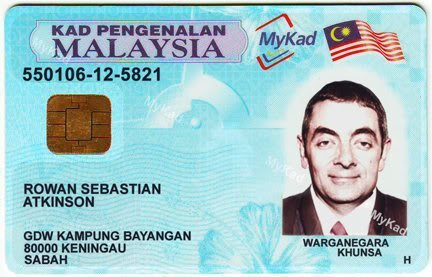

In [31]:
# Read image using Pillow

img_pl = PIL.Image.open('./malaysia_ic/000.jpg')
print(type(img_pl))

img_pl

### Text from Image

In [32]:
text_cv = pytesseract.image_to_string(img_cv)

In [33]:
print(text_cv)

In [34]:
text_pl = pytesseract.image_to_string(img_pl, lang='eng')
print(text_pl)

ROWAN SEBASTIAN
ATKINSON :

aH ~
GDW KAMPUNG BAYANGAN “
80000 KENINGAU. € WARGAMES
SABAH N be H



## Image to Data

In [35]:
data = pytesseract.image_to_data(img_cv)

In [36]:
#data.split('\n')
dataList = list(map(lambda x: x.split('\t'),data.split('\n')))
df = pd.DataFrame(dataList[1:], columns=dataList[0])

In [37]:
df.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,218,141,-1,
1,2,1,1,0,0,0,0,0,218,141,-1,
2,3,1,1,1,0,0,0,0,218,141,-1,
3,4,1,1,1,1,0,0,0,218,141,-1,
4,5,1,1,1,1,1,0,0,218,141,95.000000,


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   level      6 non-null      object
 1   page_num   5 non-null      object
 2   block_num  5 non-null      object
 3   par_num    5 non-null      object
 4   line_num   5 non-null      object
 5   word_num   5 non-null      object
 6   left       5 non-null      object
 7   top        5 non-null      object
 8   width      5 non-null      object
 9   height     5 non-null      object
 10  conf       5 non-null      object
 11  text       5 non-null      object
dtypes: object(12)
memory usage: 704.0+ bytes


In [39]:
df.dropna(inplace = True) #drop missing value
col_int = ['level','page_num','block_num','par_num','line_num','word_num','left','top','width','height','conf']
df[col_int] = df[col_int].astype(float).astype(int)

In [40]:
df.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,218,141,-1,
1,2,1,1,0,0,0,0,0,218,141,-1,
2,3,1,1,1,0,0,0,0,218,141,-1,
3,4,1,1,1,1,0,0,0,218,141,-1,
4,5,1,1,1,1,1,0,0,218,141,95,


In [41]:
image = img_cv.copy()
level = 'word'
for l,x,y,w,h,c,txt in df[['level','left','top','width','height','conf','text']].values:
    #print(l,x,y,w,h,c)
    if level == 'page':
        if l == 1:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,0),2)
        else:
            continue
    
    elif level == 'block':
        if l == 2:
            cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
        else:
            continue
            
    elif level == 'para':
        if l == 3:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        else:
            continue
    
    elif level == 'line':
        if l == 4:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
        else:
            continue
    
    elif level == 'word':
        if l == 5:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,255), 2)
            cv2.putText(image,txt,(x,y),cv2.FONT_HERSHEY_PLAIN, 1, (255,0,0), 2)
        else:
            continue

            
cv2.imshow('bounding box',image)
cv2.waitKey() #0 means manually closing the image
cv2.destroyAllWindows()